# BIKE SHARING PROJECT

# The company wants to know:


# Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands
Dataset Info: data set is attached with the project file

In [1]:
import pandas as pd
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style("darkgrid")
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
#from prettytable import PrettyTable
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.svm import SVR, NuSVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
from sklearn import svm
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_column', None)

In [2]:
df=pd.read_csv("day.csv")
df.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562


In [3]:
df.drop(columns='instant', inplace=True)

In [4]:
df1=pd.read_csv("day.csv")

In [5]:
#rename some column name
df = df.rename(columns={'dteday': 'date','mnth': 'month','cnt':'count','yr':"year"})
print(df.columns)

Index(['date', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')


In [6]:
num_feat=["temp","atemp","hum","windspeed","count"]
cat_feat=['season', 'holiday', 'month', 'year', 'weekday', 'workingday', 'weathersit']

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

date          0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
df

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [10]:
print(df[num_feat].describe())

             temp       atemp         hum   windspeed        count
count  730.000000  730.000000  730.000000  730.000000   730.000000
mean    20.319259   23.726322   62.765175   12.763620  4508.006849
std      7.506729    8.150308   14.237589    5.195841  1936.011647
min      2.424346    3.953480    0.000000    1.500244    22.000000
25%     13.811885   16.889713   52.000000    9.041650  3169.750000
50%     20.465826   24.368225   62.625000   12.125325  4548.500000
75%     26.880615   30.445775   72.989575   15.625589  5966.000000
max     35.328347   42.044800   97.250000   34.000021  8714.000000


In [11]:
print(df[cat_feat].describe())

           season     holiday       month        year     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.028767    6.526027    0.500000    2.995890    0.690411   
std      1.110184    0.167266    3.450215    0.500343    2.000339    0.462641   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.000000    7.000000    0.500000    3.000000    1.000000   
75%      3.000000    0.000000   10.000000    1.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit  
count  730.000000  
mean     1.394521  
std      0.544807  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      3.000000  


In [12]:
for col in cat_feat:
    df[col] = df[col].astype('category')

In [13]:
print(df[cat_feat].describe())

        season  holiday  month  year  weekday  workingday  weathersit
count      730      730    730   730      730         730         730
unique       4        2     12     2        7           2           3
top          3        0      1     0        1           1           1
freq       188      709     62   365      105         504         463


In [14]:
#rename  numerical month to name
import calendar
month_names = {1: 'January',
               2: 'February',
               3: 'March',
               4: 'April',
               5: 'May',
               6: 'June',
               7: 'July',
               8: 'August',
               9: 'September',
               10: 'October',
               11: 'November',
               12: 'December'}


# apply the map function to the 'month' column to convert the numerical data to month names
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

In [15]:
#seting index as instant
# df.set_index('instant', inplace=True)

In [16]:
print(df.year.unique())
print("CHANGING THE ABOVE VARIABLES TO BELOW ")
year_dict = {0: '2018', 1: '2019'}
df['year'] = df['year'].apply(lambda x: year_dict[x])
print(df.year.unique())

[0, 1]
Categories (2, int64): [0, 1]
CHANGING THE ABOVE VARIABLES TO BELOW 
['2018', '2019']
Categories (2, object): ['2018', '2019']


In [17]:
print(df.workingday.unique())
print("CHANGING THE ABOVE VARIABLES TO BELOW ")
workingday = {1: 'working day', 0: 'non-working day'}
df['workingday'] = df['workingday'].apply(lambda x: workingday[x])
print(df.workingday.unique())

[1, 0]
Categories (2, int64): [0, 1]
CHANGING THE ABOVE VARIABLES TO BELOW 
['working day', 'non-working day']
Categories (2, object): ['non-working day', 'working day']


In [18]:
print(df.season.unique())
print("CHANGING THE ABOVE VARIABLES TO BELOW ")
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].apply(lambda x: season_dict[x])
print(df.season.unique())

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
CHANGING THE ABOVE VARIABLES TO BELOW 
['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']


In [19]:
print(df.holiday.unique())
print("CHANGING THE ABOVE VARIABLES TO BELOW ")
holiday = {1: 'holiday', 0: 'not-holiday'}
df['holiday'] = df['holiday'].apply(lambda x: holiday[x])
print(df.holiday.unique())

[0, 1]
Categories (2, int64): [0, 1]
CHANGING THE ABOVE VARIABLES TO BELOW 
['not-holiday', 'holiday']
Categories (2, object): ['not-holiday', 'holiday']


In [20]:
print(df.weekday.unique())
print("CHANGING THE ABOVE VARIABLES TO BELOW ")
weekday = {1: 'monday', 2: 'tuesday',3:"wednesday",4:"thursday",5:"friday",6:"saturday",0:"sunday"}
df['weekday'] = df['weekday'].apply(lambda x: weekday[x])
print(df.weekday.unique())

[1, 2, 3, 4, 5, 6, 0]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
CHANGING THE ABOVE VARIABLES TO BELOW 
['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
Categories (7, object): ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']


In [21]:
print(df.weathersit.unique())
print("CHANGING THE ABOVE VARIABLES TO BELOW ")
weather = {1: 'clear', 2: 'misty',3: 'light snow'}
df['weathersit'] = df['weathersit'].apply(lambda x: weather[x])
print(df.weathersit.unique())

[2, 1, 3]
Categories (3, int64): [1, 2, 3]
CHANGING THE ABOVE VARIABLES TO BELOW 
['misty', 'clear', 'light snow']
Categories (3, object): ['clear', 'misty', 'light snow']


In [22]:
year_dict = {0: '2018', 1: '2019'}
df1['yr'] = df1['yr'].apply(lambda x: year_dict[x])

In [23]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,01-01-2018,Spring,2018,January,not-holiday,monday,working day,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,Spring,2018,January,not-holiday,tuesday,working day,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,Spring,2018,January,not-holiday,wednesday,working day,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,Spring,2018,January,not-holiday,thursday,working day,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,Spring,2018,January,not-holiday,friday,working day,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [24]:
df=df.drop("date",axis=1)

In [25]:
df

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,Spring,2018,January,not-holiday,monday,working day,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,2018,January,not-holiday,tuesday,working day,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,2018,January,not-holiday,wednesday,working day,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,2018,January,not-holiday,thursday,working day,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,2018,January,not-holiday,friday,working day,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,2019,December,not-holiday,friday,working day,misty,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,Spring,2019,December,not-holiday,saturday,non-working day,misty,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,Spring,2019,December,not-holiday,sunday,non-working day,misty,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,Spring,2019,December,not-holiday,monday,working day,clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [26]:
final_df= df.copy()

In [27]:
dummy_df=pd.get_dummies(df)

In [28]:
df['year'] = pd.to_numeric(df['year'])  # Convert 'year' column to numeric type

df_2019 = df[df['year'] == 2019]
df_2018 = df[df['year'] == 2018]

# EDA

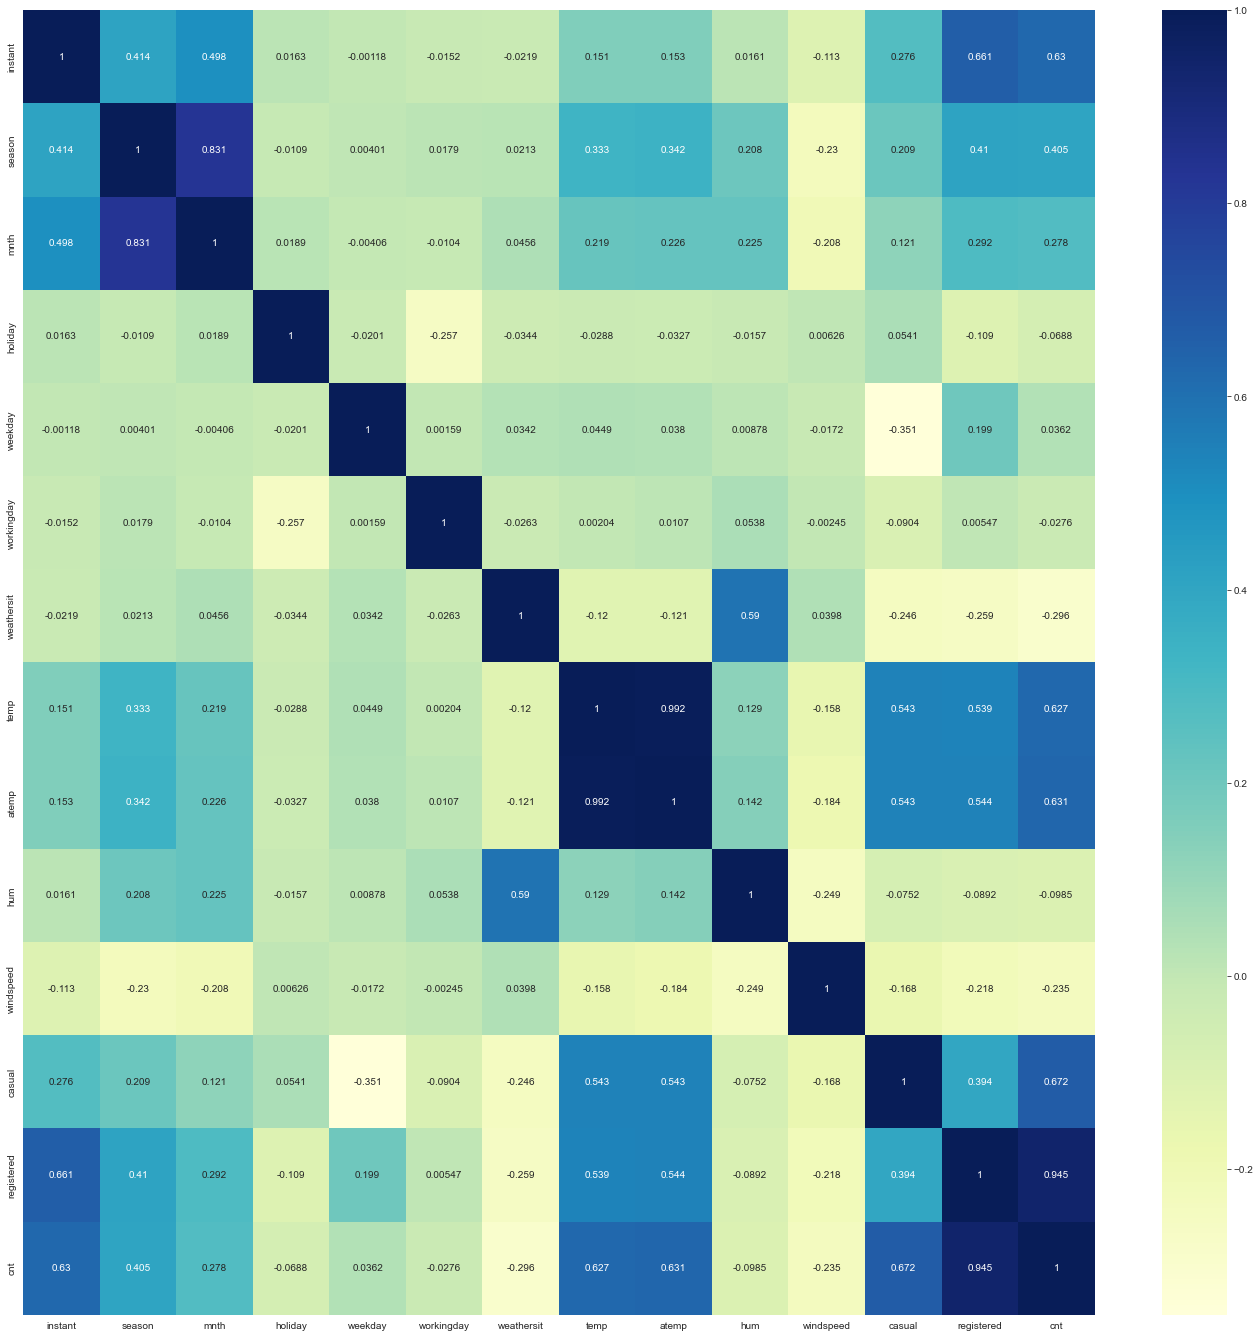

In [29]:
plt.figure(figsize = (24, 24))
sns.heatmap(df1.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

<AxesSubplot:>

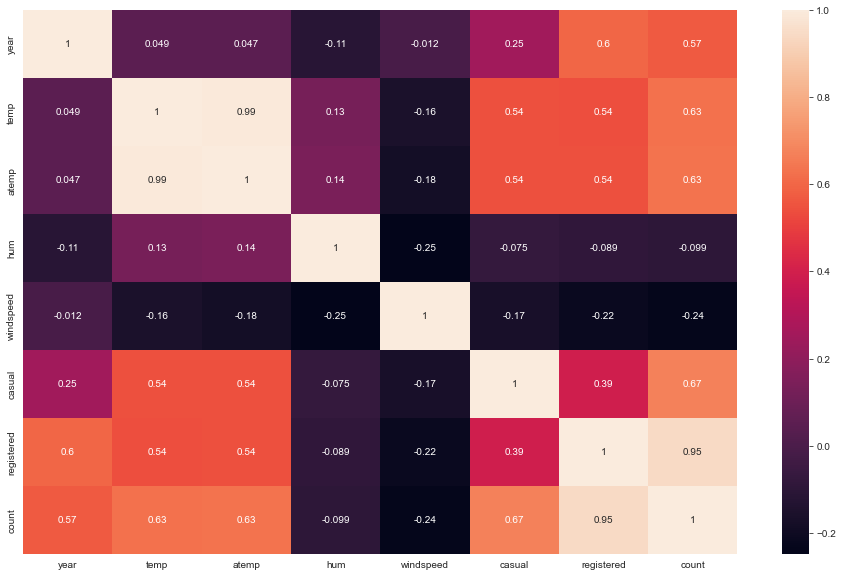

In [30]:
#numerical features of the dataset
ax = plt.subplots(figsize=(16,10))  
sns.heatmap(data= df.corr() , annot= True)

# Here we can say that holiday, weekday, workingday, hum are not showing the relationship to the count. we will crossvalidate it

In [31]:
df1=df1.drop("instant",axis=1)

In [32]:
corr=df1.corr()

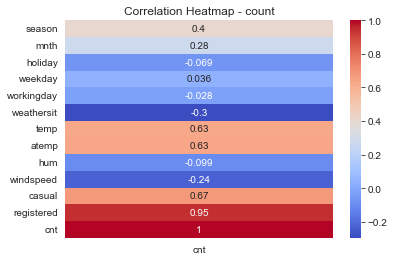

In [33]:
corr_cnt = pd.DataFrame(corr.loc['cnt'])
sns.heatmap(corr_cnt, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - count')
plt.show()


# SINCE THE REGISTERED,INSTANT  AND CASUAL  DOES NOT REALLY PROVIDE ANY GREAT INSIGHTS ,THE  CLIMATIC CONDITIONS PLAY A GOOD ROLE IN INFLUENCING THE COUNT

<AxesSubplot:xlabel='count'>

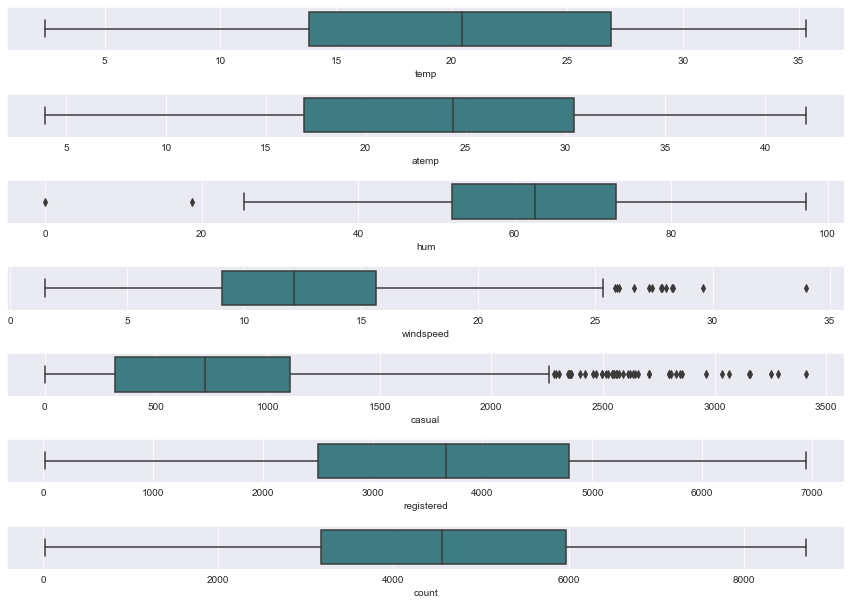

In [34]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=1, bottom=0.1)
sns.boxplot(x='temp',data=df1,palette='crest',ax=axes[0])
sns.boxplot(x='atemp',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='hum',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='windspeed',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='casual',data=df,palette='crest',ax=axes[4])
sns.boxplot(x='registered',data=df,palette='crest',ax=axes[5])
sns.boxplot(x='count',data=df,palette='crest',ax=axes[6])

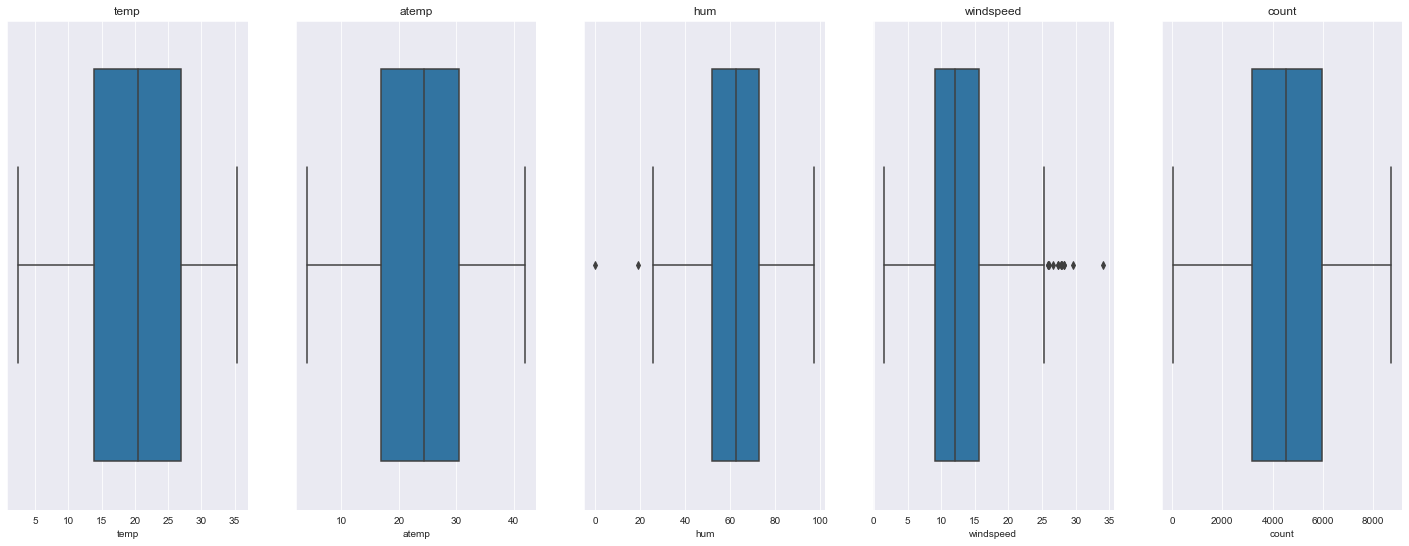

In [35]:
fig, axs = plt.subplots(ncols=len(num_feat), figsize=(25,9))

for i, col in enumerate(num_feat):
    sns.boxplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(col)

plt.show()


# THERE ARE OUTLIERS TO THE DATA FOR HUMIDITY AND WIND SPEED 

<AxesSubplot:xlabel='count', ylabel='registered'>

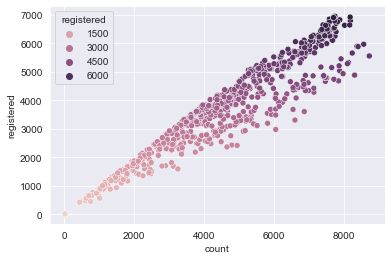

In [36]:
sns.scatterplot(data=df, x='count', y='registered', hue='registered' )


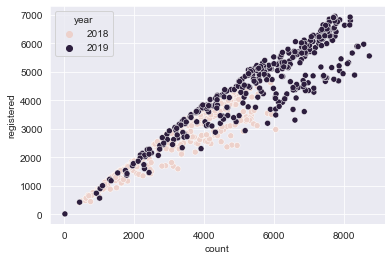

In [37]:
sns.scatterplot(data=df, x='count', y='registered', hue='year')
plt.show()


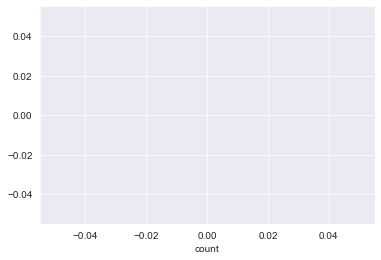

In [38]:
sns.scatterplot(df_2018["count"])
sns.scatterplot(df_2019["count"])
plt.show()

# THE ABOVE SCATTERPLOT DENOTES THAT DURING THE SECOND YEAR THE COUNTS HAS INCREASED IN COUNT 

In [39]:
# sns.pairplot(data=df,hue="count")

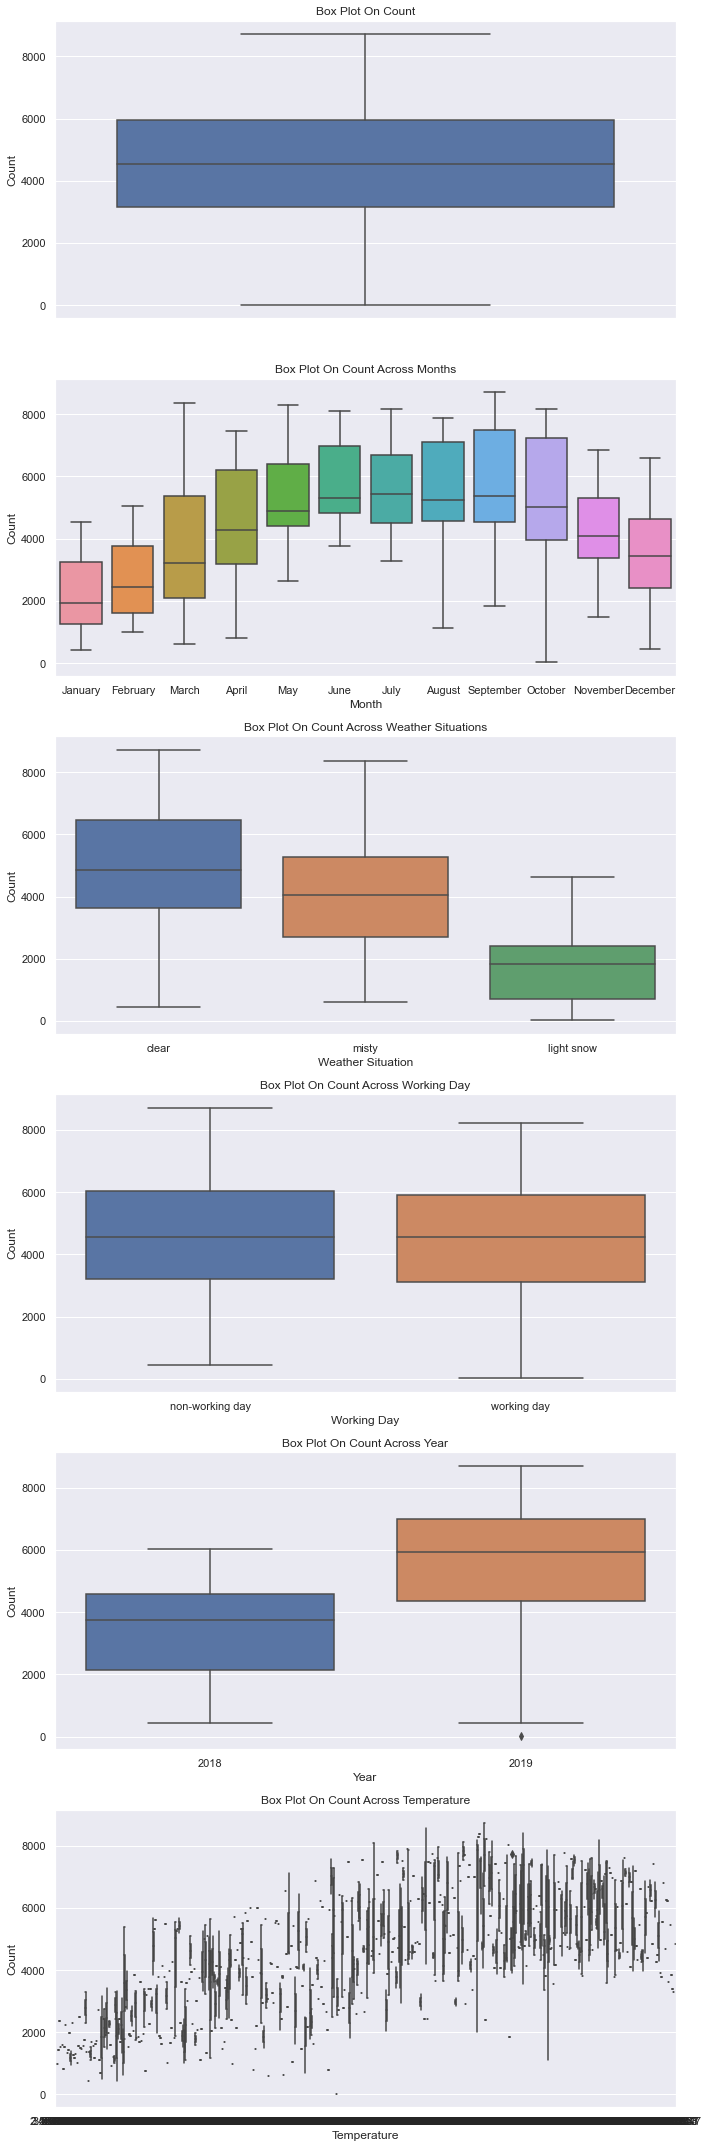

In [40]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 30))

sns.boxplot(data=df, y="count", orient="v", ax=axes[0])
sns.boxplot(data=df, y="count", x="month", orient="v", ax=axes[1])
sns.boxplot(data=df, y="count", x="weathersit", orient="v", ax=axes[2])
sns.boxplot(data=df, y="count", x="workingday", orient="v", ax=axes[3])
sns.boxplot(data=df, y="count", x="year", orient="v", ax=axes[4])
sns.boxplot(data=df, y="count", x="temp", orient="v", ax=axes[5])

axes[0].set(ylabel='Count', title="Box Plot On Count")
axes[1].set(xlabel='Month', ylabel='Count', title="Box Plot On Count Across Months")
axes[1].set(xlabel='Month', ylabel='Count', title="Box Plot On Count Across Months")
axes[2].set(xlabel='Weather Situation', ylabel='Count', title="Box Plot On Count Across Weather Situations")
axes[3].set(xlabel='Working Day', ylabel='Count', title="Box Plot On Count Across Working Day")
axes[4].set(xlabel='Year', ylabel='Count', title="Box Plot On Count Across Year")
axes[5].set(xlabel='Temperature', ylabel='Count', title="Box Plot On Count Across Temperature")

plt.tight_layout()
plt.show()


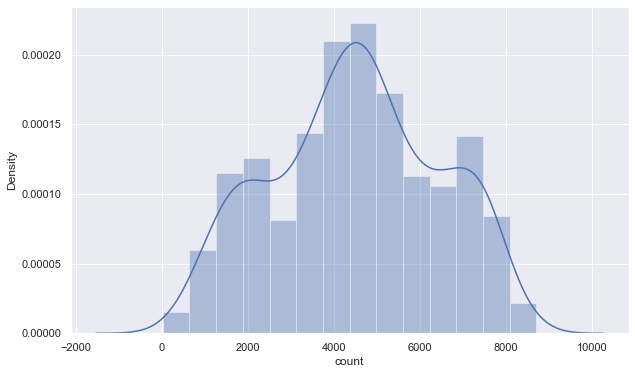

In [41]:
plt.figure(figsize=[10,6])
sns.distplot(df["count"])
plt.show()

In [42]:
X=df[["windspeed","hum","atemp","temp","count"]]

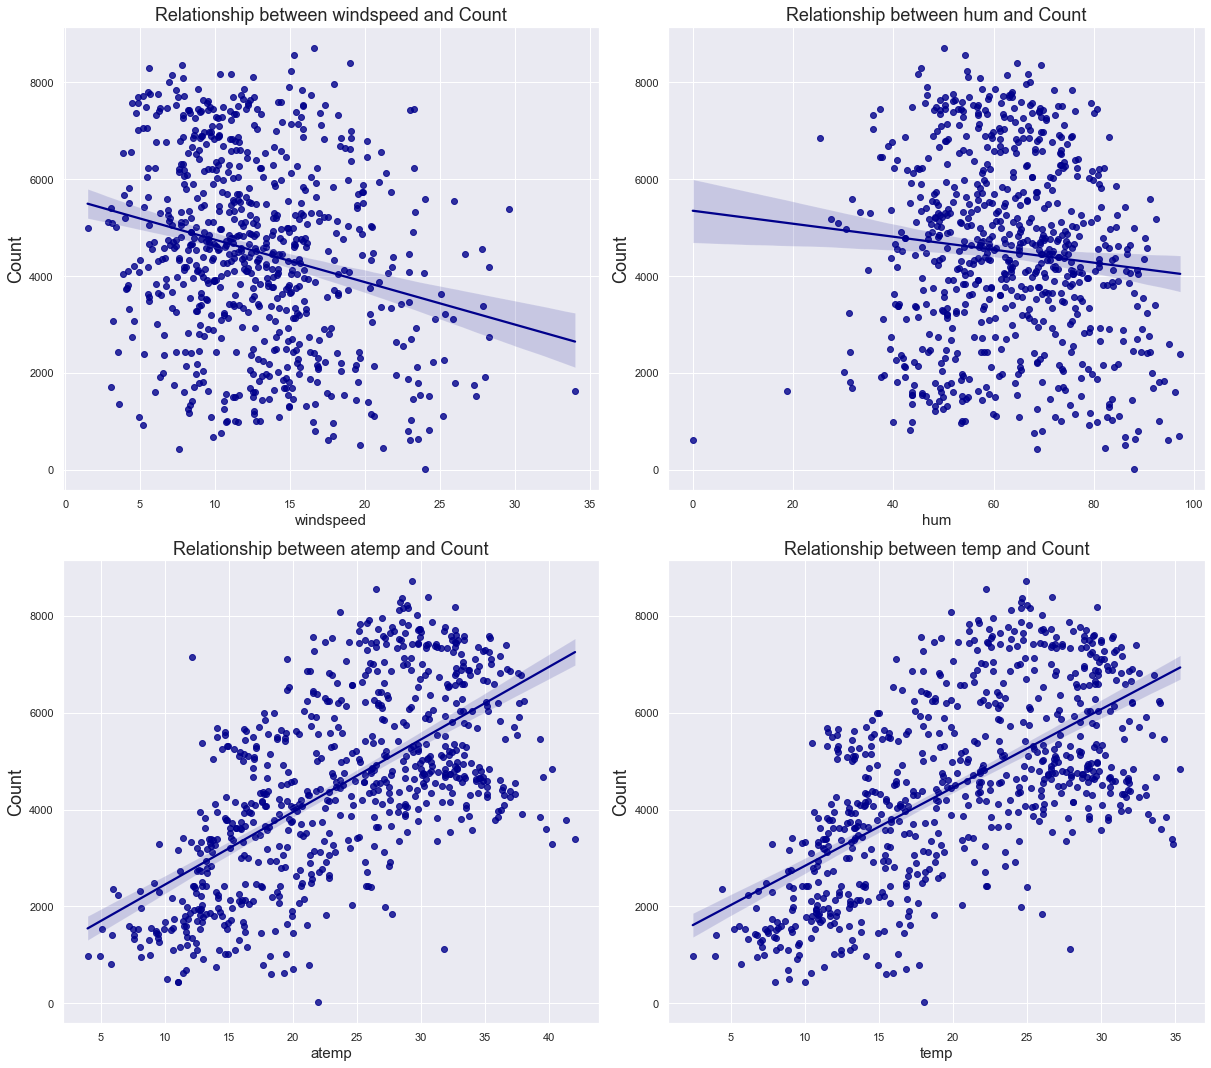

In [43]:
plt.figure(figsize=(17, 15))
cnt = 1
for i in X.columns[:-1]:
    plt.subplot(2, 2, cnt)
    sns.regplot(x=X[i], y=X['count'], color='darkblue')
    plt.xlabel(i, fontsize=15)
    plt.ylabel('Count', fontsize=18)
    plt.title('Relationship between {} and Count'.format(i), fontsize=18)
    cnt += 1 
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='count'>

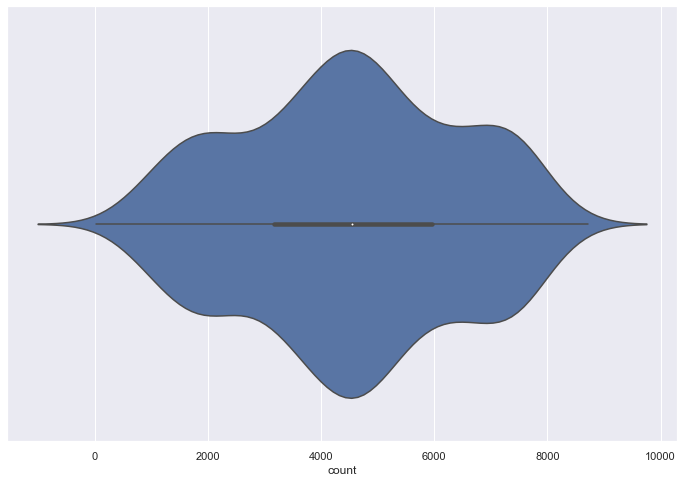

In [44]:
plt.figure(figsize=[12,8])
sns.violinplot( x="count",hue=df.registered, data=df)

# ------------------------------------------------------------------------------------------

# * WEEKDAYS *

<AxesSubplot:xlabel='weekday'>

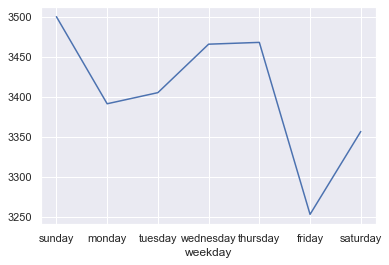

In [45]:
week_count=df_2018.groupby("weekday")["count"].mean()
week_count.plot()


# FROM THE ABOVE PLOT WE UNDERSTAND THAT THERE IS MORE USAGE ON SUNDAYS AND COMPARITIVELY GOOD USE ON WEDNESDAYS AND THURSDAY

<AxesSubplot:xlabel='count', ylabel='weekday'>

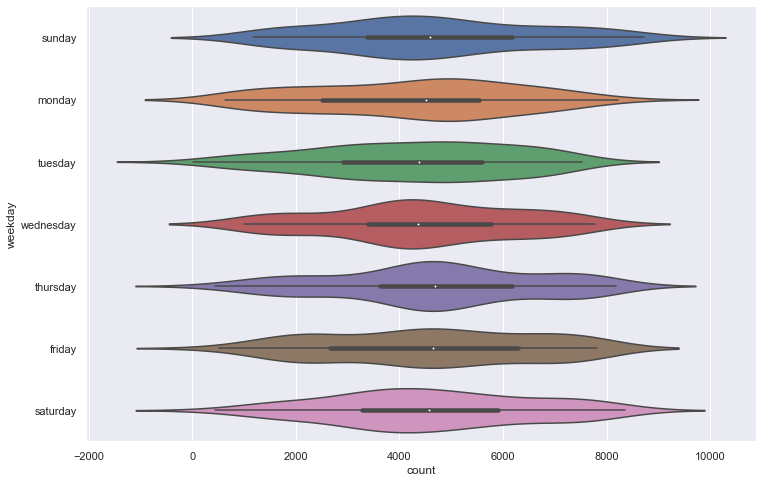

In [46]:
plt.figure(figsize=[12,8])
sns.violinplot( x="count",y="weekday", data=df)

In [47]:
weekday_counts=df.groupby('weekday')['count'].sum()
weekday_counts

weekday
sunday       485235
monday       447281
tuesday      448822
wednesday    462276
thursday     487923
friday       478132
saturday     481176
Name: count, dtype: int64

<AxesSubplot:xlabel='weekday'>

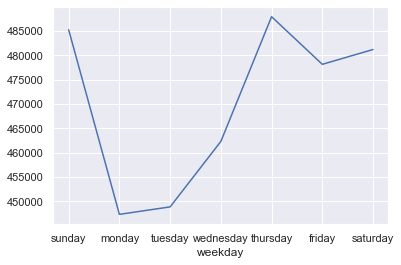

In [48]:
weekday_counts.plot()

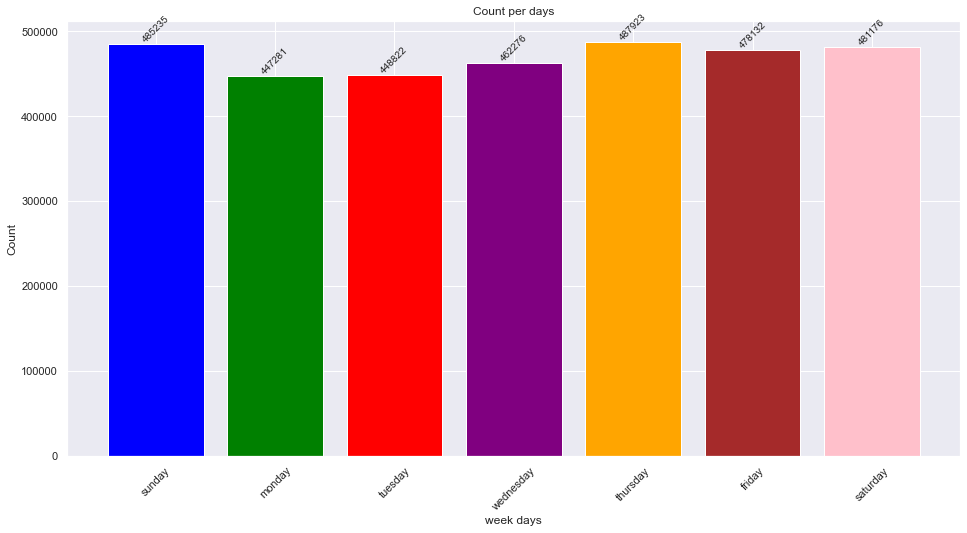

In [49]:
fig, ax = plt.subplots(figsize=[16,8])
bars = ax.bar(weekday_counts.index, weekday_counts.values, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xticks(rotation=45)
ax.set_xlabel('week days')
ax.set_ylabel('Count')
ax.set_title('Count per days')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), 
            ha='center', va='bottom', fontsize=10,rotation=45)
plt.show()


# THERE IS A DECREASE IN USAGE FOR THE FIRST 2 DAYS OF THE WEEK COMPARITIVELY .MONDAY AND TUESDAY RESPECTIVELY ,MOST USED DAY IN THE WEEK IS THURSDAY IN RANKING

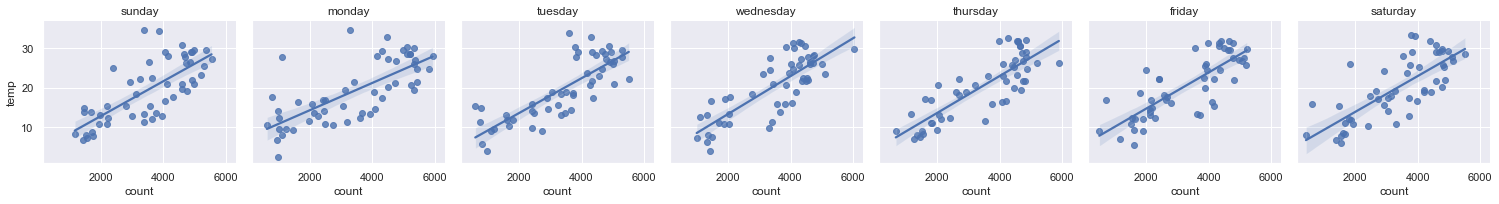

In [50]:
g=sns.FacetGrid(data=df_2018,col="weekday");
g.map_dataframe(sns.regplot,x="count",y="temp")
g.set_titles(col_template='{col_name}');

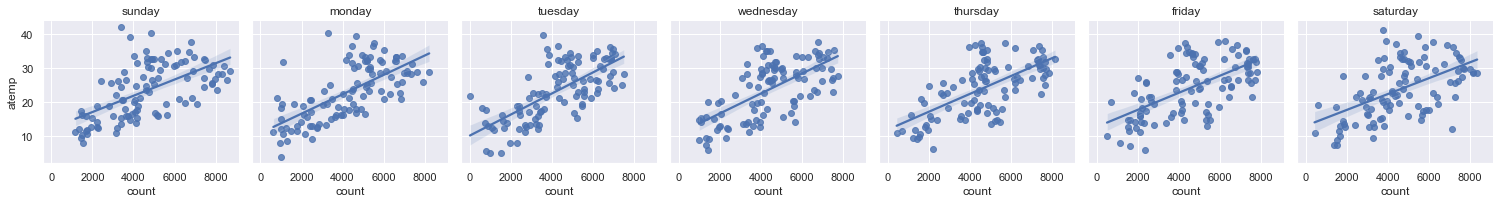

In [51]:
g=sns.FacetGrid(data=df,col="weekday");
g.map_dataframe(sns.regplot,x="count",y="atemp")
g.set_titles(col_template='{col_name}');

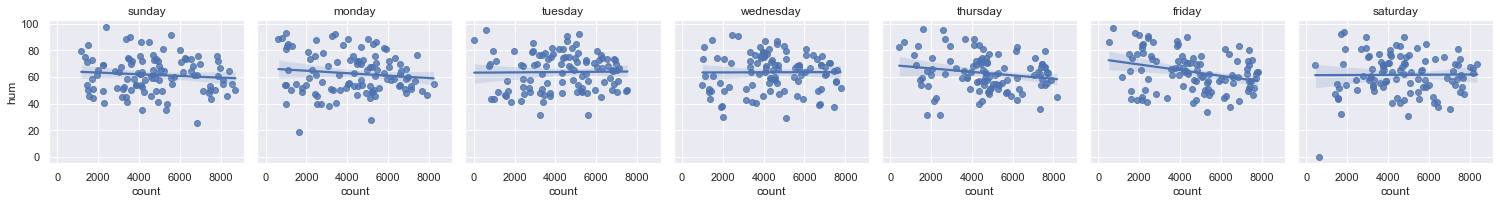

In [52]:
g=sns.FacetGrid(data=df,col="weekday");
g.map_dataframe(sns.regplot,x="count",y="hum")
g.set_titles(col_template='{col_name}');

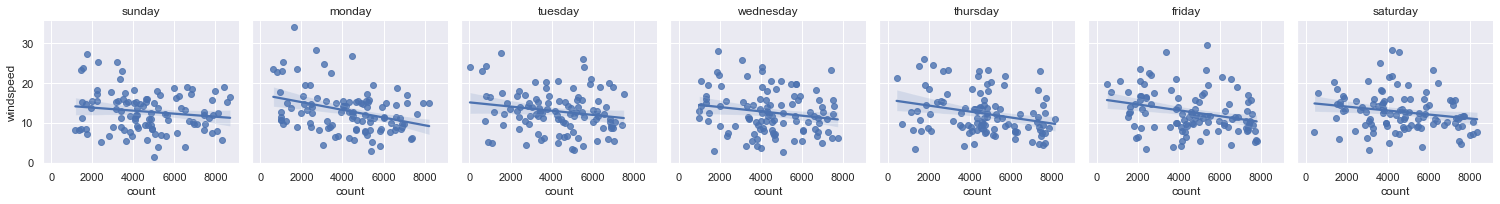

In [53]:
g=sns.FacetGrid(data=df,col="weekday");
g.map_dataframe(sns.regplot,x="count",y="windspeed")
g.set_titles(col_template='{col_name}');

# THE ABOVE FACETPLOT OF REGPLOTS SHOWS HOW THE CLIMATIC CONDITIONS ON THE SAID DAYS EFFECTED THE USAGE COUNTS

# ------------------------------------------------------------------------------------------

#  * MONTH *

In [54]:
month_avg_2018 = df_2018.groupby('month')['count'].mean()
print(month_avg_2018)

month
January      1231.903226
February     1721.964286
March        2065.967742
April        3162.333333
May          4381.322581
June         4783.733333
July         4559.387097
August       4409.387097
September    4247.266667
October      3984.225806
November     3405.566667
December     2816.870968
Name: count, dtype: float64


In [55]:
month_avg_2019 = df_2019.groupby('month')['count'].mean()
print(month_avg_2019)

month
January      3120.774194
February     3617.964286
March        5318.548387
April        5807.466667
May          6318.225806
June         6761.000000
July         6567.967742
August       6919.451613
September    7285.766667
October      6414.225806
November     5088.800000
December     3990.741935
Name: count, dtype: float64


# SINCE TEMP SHOWS HIGH CORRELATION WE WILL SEE HOW IT EFFECTS COUNT IN EACH MONTH 

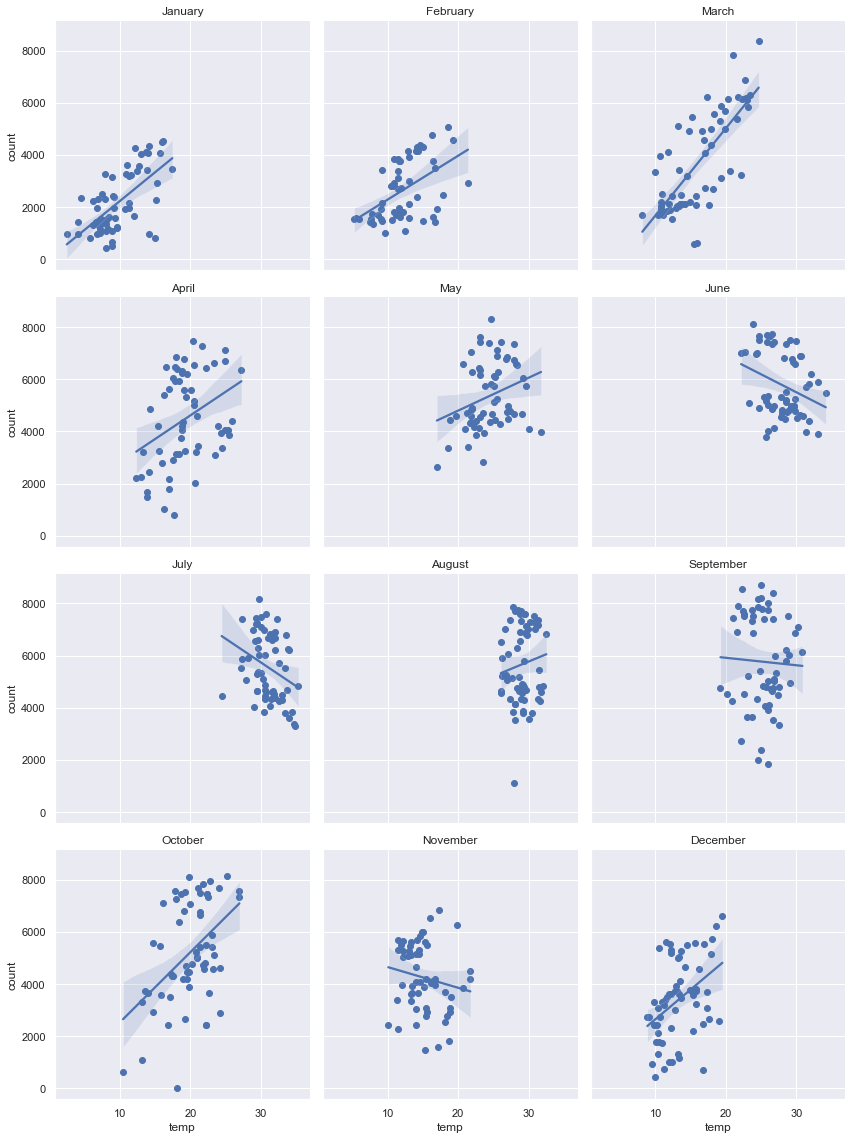

In [56]:
g = sns.FacetGrid(df, col='month', col_wrap=3, height=4)
g.map(sns.regplot, 'temp', 'count', scatter_kws={'alpha':1})
g.set_titles('{col_name}')
plt.show()

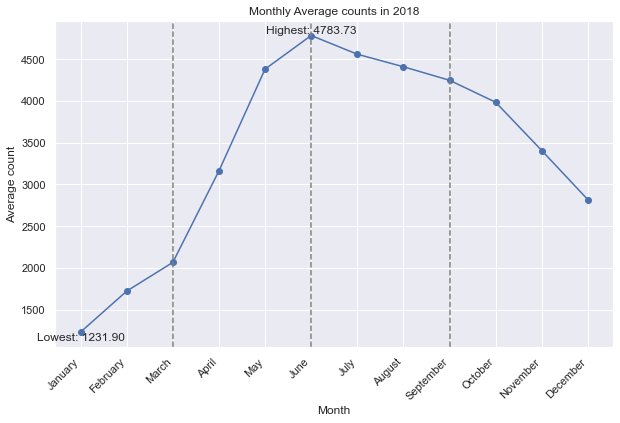

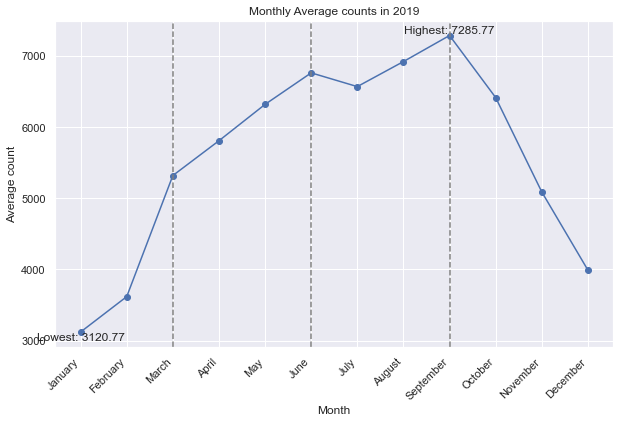

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(month_avg_2018.index, month_avg_2018.values,marker="o")
ax.set_xticks(range(len(month_avg_2018)))
ax.set_xticklabels(month_avg_2018.index, rotation=45, ha='right')
ax.set_xlabel('Month')
ax.set_ylabel('Average count')
ax.set_title('Monthly Average counts in 2018')


max_value = month_avg_2018.max()
max_index = month_avg_2018.idxmax()
min_value = month_avg_2018.min()
min_index = month_avg_2018.idxmin()


ax.text(max_index, max_value, f'Highest: {max_value:.2f}', ha='center', va='bottom')
ax.text(min_index, min_value, f'Lowest: {min_value:.2f}', ha='center', va='top')
for i in range(3):
    ax.axvline(x=i*3+2, linestyle='--', color='grey')
plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(month_avg_2019.index, month_avg_2019.values,marker="o")
ax.set_xticks(range(len(month_avg_2019)))
ax.set_xticklabels(month_avg_2019.index, rotation=45, ha='right')
ax.set_xlabel('Month')
ax.set_ylabel('Average count')
ax.set_title('Monthly Average counts in 2019')

max_value = month_avg_2019.max()
max_index = month_avg_2019.idxmax()
min_value = month_avg_2019.min()
min_index = month_avg_2019.idxmin()

ax.text(max_index, max_value, f'Highest: {max_value:.2f}', ha='center', va='bottom')
ax.text(min_index, min_value, f'Lowest: {min_value:.2f}', ha='center', va='top')

for i in range(3):
    ax.axvline(x=i*3+2, linestyle='--', color='grey')

plt.show()


# Both the plots show that during the first three months of the year, the average count of users renting bikes increased slowly. Then during the next three months, the average count increased more steadily. The third quarter of the year had the highest average counts, which remained high throughout that quarter. Finally, during the last three months of the year, the average count of users decreased slowly. This indicates that the trend is seasonal and repeats over time.

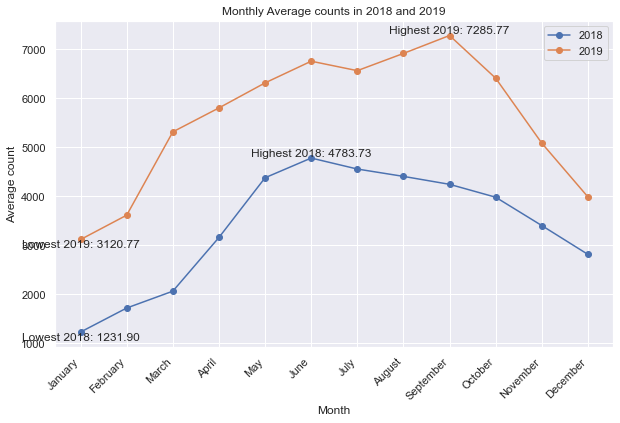

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(month_avg_2018.index, month_avg_2018.values, marker="o", label='2018')
plt.plot(month_avg_2019.index, month_avg_2019.values, marker="o", label='2019')

ax.set_xticks(range(len(month_avg_2019)))
ax.set_xticklabels(month_avg_2019.index, rotation=45, ha='right')
ax.set_xlabel('Month')
ax.set_ylabel('Average count')
ax.set_title('Monthly Average counts in 2018 and 2019')

max_value_2018 = month_avg_2018.max()
max_index_2018 = month_avg_2018.idxmax()
min_value_2018 = month_avg_2018.min()
min_index_2018 = month_avg_2018.idxmin()

ax.text(max_index_2018, max_value_2018, f'Highest 2018: {max_value_2018:.2f}', ha='center', va='bottom')
ax.text(min_index_2018, min_value_2018, f'Lowest 2018: {min_value_2018:.2f}', ha='center', va='top')

max_value_2019 = month_avg_2019.max()
max_index_2019 = month_avg_2019.idxmax()
min_value_2019 = month_avg_2019.min()
min_index_2019 = month_avg_2019.idxmin()

ax.text(max_index_2019, max_value_2019, f'Highest 2019: {max_value_2019:.2f}', ha='center', va='bottom')
ax.text(min_index_2019, min_value_2019, f'Lowest 2019: {min_value_2019:.2f}', ha='center', va='top')

plt.legend()

plt.show()


# The average number of bikes rented per month was highest in 2019 compared to 2018, which means more people were using the bike rental service. In 2018, the least number of bikes rented was 1231, while in 2019 it was 3120. This means that in 2019, even the least number of bikes rented was more than in 2018. The increase in bike usage in 2019 suggests that more people were becoming regular and occasional customers, which is a sign of growth for the bike rental service.

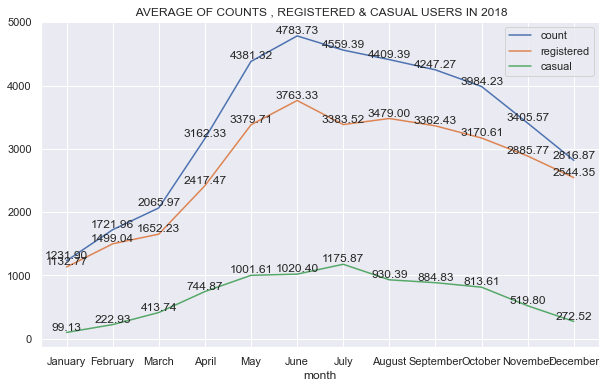

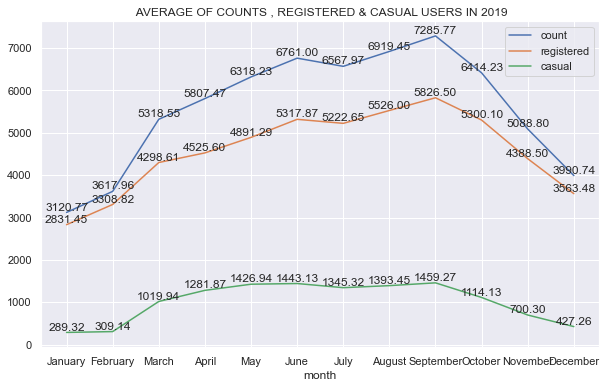

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xticks(range(len(month_avg_2018)))
ax.set_xticklabels(month_avg_2018.index)
month_counts = df_2018.groupby('month')['count'].mean()
month_counts.plot()
for i, month in enumerate(month_avg_2018.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
month_counts = df_2018.groupby('month')['registered'].mean()
month_counts.plot()
for i, month in enumerate(month_avg_2018.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
month_counts = df_2018.groupby('month')['casual'].mean()
month_counts.plot()
plt.title(" AVERAGE OF COUNTS , REGISTERED & CASUAL USERS IN 2018")
for i, month in enumerate(month_avg_2018.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
ax.legend()

#second plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xticks(range(len(month_avg_2019)))
ax.set_xticklabels(month_avg_2019.index)
month_counts = df_2019.groupby('month')['count'].mean()
month_counts.plot()
for i, month in enumerate(month_avg_2019.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
month_counts = df_2019.groupby('month')['registered'].mean()
month_counts.plot()
for i, month in enumerate(month_avg_2019.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
month_counts = df_2019.groupby('month')['casual'].mean()
month_counts.plot()
plt.title(" AVERAGE OF COUNTS , REGISTERED & CASUAL USERS IN 2019")
for i, month in enumerate(month_avg_2019.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
ax.legend()


Text(0.5, 1.0, 'MINIMUM AND MAXIMUM OF temperature IN 2019')

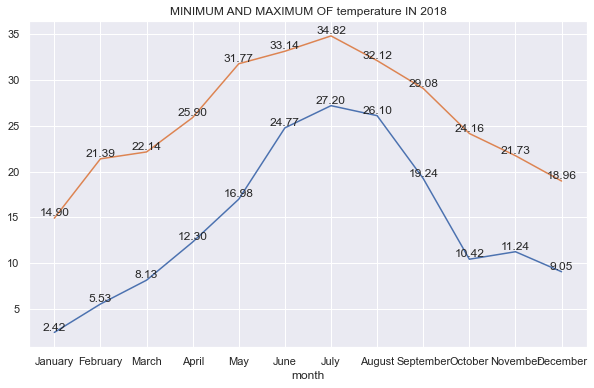

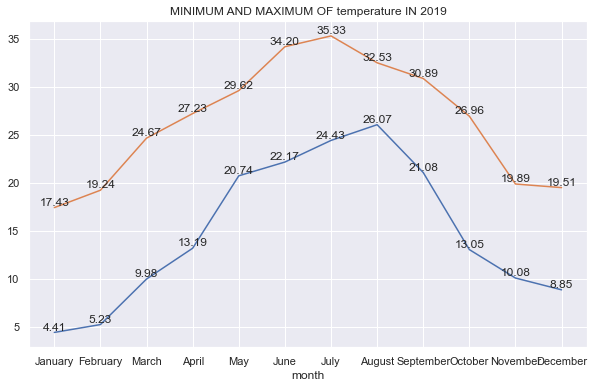

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xticks(range(len(month_avg_2019)))
ax.set_xticklabels(month_avg_2019.index)
month_counts = df_2018.groupby('month')['temp'].min()
month_counts.plot()
for i, month in enumerate(month_avg_2018.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
month_counts = df_2018.groupby('month')['temp'].max()
month_counts.plot()
for i, month in enumerate(month_avg_2018.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
plt.title("MINIMUM AND MAXIMUM OF temperature IN 2018")
#SECOND PLOT
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xticks(range(len(month_avg_2019)))
ax.set_xticklabels(month_avg_2019.index)
month_counts = df_2019.groupby('month')['temp'].min()
month_counts.plot()
for i, month in enumerate(month_avg_2019.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
month_counts = df_2019.groupby('month')['temp'].max()
for i, month in enumerate(month_avg_2019.index):
    count_avg = month_counts[i]
    ax.text(i, count_avg, f'{count_avg:.2f}', ha='center', va='bottom')
month_counts.plot()
plt.title("MINIMUM AND MAXIMUM OF temperature IN 2019")

# When we compare the temperature trend lines with the count of bikes used, we notice some similarities. During the warmer months, the number of bikes used increases, and during the colder months, it comparatively decreases. This can be explained by the fact that during warmer weather, people tend to spend more time outside and may choose to bike instead of driving a car or using public transportation. Additionally, biking may be a more pleasant and enjoyable experience during warm weather. On the other hand, during colder weather, people may be less inclined to bike due to uncomfortable temperatures, and may choose other modes of transportation instead. This trend in bike usage can be attributed to seasonal changes in weather and human behavior

# THERE SEEMS TO BE PEAK  IN COUNT OF USAGE DURING THE MONTH OF JUNE,JULY AND AUGUST . &  AFTER SEPTEMBER IT RESIDUALLY DECREASES TILL FEBRRARY THEN PICKS UP AGAIN .

# ------------------------------------------------------------------------------------------

# * SEASONAL *

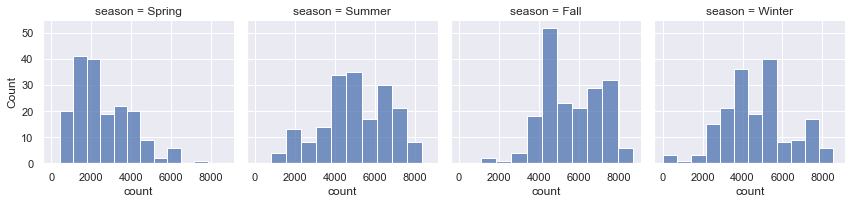

In [61]:
g=sns.FacetGrid(data=df,col="season");
g.map(sns.histplot,"count")

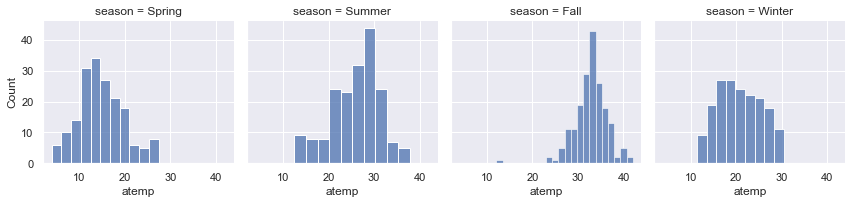

In [62]:
g=sns.FacetGrid(data=df,col="season");
g.map(sns.histplot,"atemp")

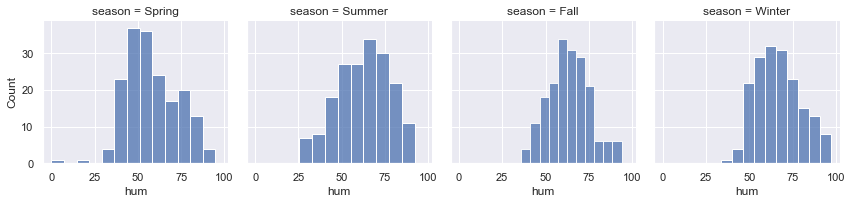

In [63]:
g=sns.FacetGrid(data=df,col="season");
g.map(sns.histplot,"hum")

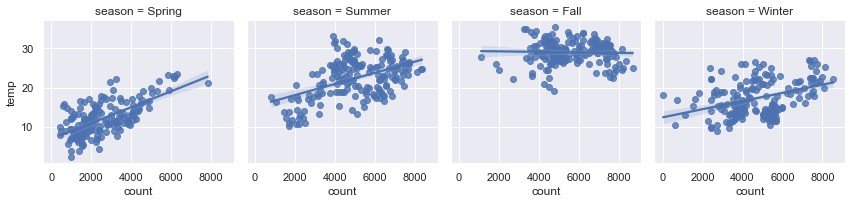

In [64]:
g=sns.FacetGrid(data=df,col="season");
g.map_dataframe(sns.regplot,x="count",y="temp")

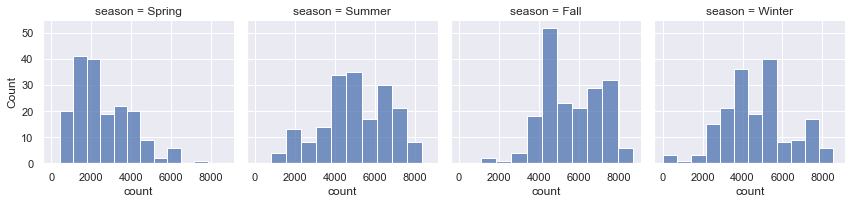

In [65]:
g=sns.FacetGrid(data=df,col="season");
g.map_dataframe(sns.histplot,x="count")

<AxesSubplot:xlabel='season', ylabel='count'>

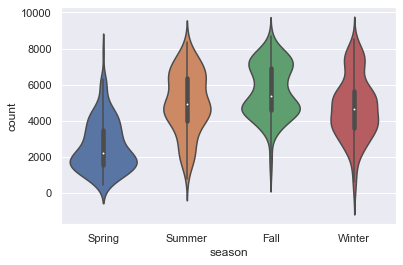

In [66]:
sns.violinplot(data=df,y="count",x="season")

# CONCLUSIONS:

# DURING THE SPRING AND SUMMER SEASON THE DISTRIBUTION IS VERY HIGH COMPARED TO  THE OTHER TWO SEASONS 

# FROM THE ABOVE VISUALISATIONS WE CAN CONCLUDE THAT  CLIMATIC CONDITIONS PLAY A MAJOR ROLE IN INFLUENCING  THE SUM USE OF BIKE. 


# IN WARMER CONDITIONS THERE IS SIGNIFICANT INCREASE IN THE USE OF BIKES AND VISE VERSA IN COLD CONDITIONS

# ============================================================

# ------------------------------------------------------------------------------------------

# MODEL BUILDING

In [67]:
dummy_df=dummy_df.drop(["casual","registered"],axis=1)

In [68]:
dummy_df

,temp,atemp,hum,windspeed,count,season_Spring,season_Summer,season_Fall,season_Winter,year_2018,year_2019,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,holiday_not-holiday,holiday_holiday,weekday_sunday,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,workingday_non-working day,workingday_working day,weathersit_clear,weathersit_misty,weathersit_light snow
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0
726,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0
727,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0


In [69]:
X= dummy_df.drop("count", axis=1)
Y= dummy_df["count"]

x_train, x_test, y_train, y_test= train_test_split(X, Y,test_size=0.3 ,random_state=0)
x_train = sm.add_constant(x_train)

model1= sm.OLS(y_train,x_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     84.78
Date:                Fri, 19 May 2023   Prob (F-statistic):          7.04e-169
Time:                        08:00:03   Log-Likelihood:                -4116.0
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     481   BIC:                             8419.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# model building on min-max scaled numerial features

In [70]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
scaler = MinMaxScaler()
dummy_df[num_feat] = scaler.fit_transform(dummy_df[num_feat])

In [71]:
X = dummy_df.drop({'count'}, axis=1)
y = dummy_df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
X_train

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Fall,season_Winter,year_2018,year_2019,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,holiday_not-holiday,holiday_holiday,weekday_sunday,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,workingday_non-working day,workingday_working day,weathersit_clear,weathersit_misty,weathersit_light snow
683,0.327133,0.322150,0.637961,0.269229,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
645,0.403972,0.404998,0.729648,0.344872,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
163,0.717562,0.685963,0.508569,0.583333,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
360,0.331287,0.326273,0.784062,0.342338,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0
640,0.745598,0.682653,0.816195,0.091026,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.405237,0.395131,0.542304,0.511703,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
106,0.495350,0.481247,0.493144,0.579511,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
270,0.717562,0.651183,0.872751,0.260245,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0
435,0.507811,0.499487,0.502999,0.382050,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0


In [73]:
model2= sm.OLS(y_train,X_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     91.53
Date:                Fri, 19 May 2023   Prob (F-statistic):          1.53e-175
Time:                        08:00:03   Log-Likelihood:                 521.15
No. Observations:                 511   AIC:                            -982.3
Df Residuals:                     481   BIC:                            -855.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
temp                

# RECURSIVE FEATURE ELIMINATION

In [74]:
model = LinearRegression()  
rfe = RFE(estimator=model, n_features_to_select=14) 
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=14)

In [75]:
selected_features = X_train.columns[rfe.support_]

In [76]:
selected_features

Index(['atemp', 'hum', 'windspeed', 'season_Spring', 'season_Winter',
       'year_2018', 'year_2019', 'month_July', 'month_September',
       'month_November', 'month_December', 'holiday_not-holiday',
       'weathersit_clear', 'weathersit_light snow'],
      dtype='object')

In [77]:
feature_ranks = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
feature_ranks.sort(key=lambda x: x[2], reverse=True)
feature_ranks


[('month_June', False, 23),
 ('workingday_non-working day', False, 22),
 ('workingday_working day', False, 21),
 ('month_April', False, 20),
 ('month_January', False, 19),
 ('weekday_friday', False, 18),
 ('weekday_thursday', False, 17),
 ('weekday_saturday', False, 16),
 ('weekday_sunday', False, 15),
 ('month_August', False, 14),
 ('month_February', False, 13),
 ('season_Fall', False, 12),
 ('season_Summer', False, 11),
 ('weekday_tuesday', False, 10),
 ('weekday_wednesday', False, 9),
 ('weekday_monday', False, 8),
 ('month_October', False, 7),
 ('weathersit_misty', False, 6),
 ('holiday_holiday', False, 5),
 ('month_May', False, 4),
 ('month_March', False, 3),
 ('temp', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Winter', True, 1),
 ('year_2018', True, 1),
 ('year_2019', True, 1),
 ('month_July', True, 1),
 ('month_September', True, 1),
 ('month_November', True, 1),
 ('month_December', True, 1),
 ('holiday_not-h

# Building model using 14 features after elimination

In [78]:
# Creating X_test dataframe with RFE selected variables+ some of the corelating varianbles
X_train_rfe = X_train[['season_Winter', 'year_2018', 'year_2019', 'month_January',
       'month_February', 'month_June', 'month_September', 'month_November',
       'month_December', 'weathersit_light snow','temp','atemp','hum','windspeed']]

In [79]:
# Adding a constant variable 
X_train = sm.add_constant(X_train_rfe)

In [80]:
X_train.head()

,const,season_Winter,year_2018,year_2019,month_January,month_February,month_June,month_September,month_November,month_December,weathersit_light snow,temp,atemp,hum,windspeed
683,1.0,1,0,1,0,0,0,0,1,0,0,0.327133,0.322150,0.637961,0.269229
645,1.0,1,0,1,0,0,0,0,0,0,0,0.403972,0.404998,0.729648,0.344872
163,1.0,0,1,0,0,0,1,0,0,0,0,0.717562,0.685963,0.508569,0.583333
360,1.0,0,1,0,0,0,0,0,0,1,0,0.331287,0.326273,0.784062,0.342338
640,1.0,1,0,1,0,0,0,0,0,0,0,0.745598,0.682653,0.816195,0.091026


In [81]:
lm = sm.OLS(y_train,X_train).fit()   

In [82]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     165.5
Date:                Fri, 19 May 2023   Prob (F-statistic):          4.74e-171
Time:                        08:00:03   Log-Likelihood:                 469.69
No. Observations:                 511   AIC:                            -911.4
Df Residuals:                     497   BIC:                            -852.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31



# CHECKING VIF (Variance Inflation Factor)

In [83]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,year_2018,inf
3,year_2019,inf
12,atemp,177.26
11,temp,176.10
4,month_January,1.95
1,season_Winter,1.86
8,month_November,1.77
5,month_February,1.55
9,month_December,1.48
13,hum,1.26


SINCE YEAR_2018 AND YEAR_2019 HAS A SIGNIFICANT HIGHER VIF LETS CREATE ONE  MODEL WITHOUT THEM

In [84]:
X_train_rfe = X_train[['season_Winter',  'month_January','month_February', 'month_June', 'month_September', 'month_November',
       'month_December', 'weathersit_light snow','temp','atemp','hum','windspeed']]

In [85]:
# Adding a constant variable 
X_train = sm.add_constant(X_train_rfe)

In [86]:
lm = sm.OLS(y_train,X_train).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     55.48
Date:                Fri, 19 May 2023   Prob (F-statistic):           8.56e-84
Time:                        08:00:04   Log-Likelihood:                 259.06
No. Observations:                 511   AIC:                            -492.1
Df Residuals:                     498   BIC:                            -437.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [87]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = True)
vif

,Features,VIF
5,month_September,1.13
8,weathersit_light snow,1.15
4,month_June,1.19
11,hum,1.24
12,windspeed,1.26
7,month_December,1.48
3,month_February,1.55
6,month_November,1.77
1,season_Winter,1.86
2,month_January,1.95


# REMOVE CONST FROM THE DATASET SINCE IT GIVES HIGH VIF

In [88]:
X_train_rfe = X_train[['season_Winter',  'month_January','month_February', 'month_June', 'month_September', 'month_November',
       'month_December', 'weathersit_light snow','temp','atemp','hum','windspeed']]

In [89]:
lm = sm.OLS(y_train,X_train_rfe).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              486.8
Date:                Fri, 19 May 2023   Prob (F-statistic):                   2.02e-266
Time:                        08:00:04   Log-Likelihood:                          214.46
No. Observations:                 511   AIC:                                     -404.9
Df Residuals:                     499   BIC:                                     -354.1
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

# 

# The model's performance, as indicated by the R-squared value, is 0.921, suggesting that approximately 92.1% of the variance in the target variable can be explained by the selected features. The adjusted R-squared is 0.919, which accounts for the number of predictors in the model. The F-statistic is significant at a very low p-value, indicating that the overall model is statistically significant.

# 

# 

# LETS TRY OTHER  REGRESSION TECHNIQUES

# POLYNOMIAL REGRESSION

# 

In [90]:
X = dummy_df.drop({'count'}, axis=1)
y = df['count']

In [91]:
degree = 2  # Degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [92]:
model = sm.OLS(y, X_poly)
results = model.fit()

In [93]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     32.62
Date:                Fri, 19 May 2023   Prob (F-statistic):          1.96e-195
Time:                        08:00:04   Log-Likelihood:                -5419.0
No. Observations:                 730   AIC:                         1.142e+04
Df Residuals:                     437   BIC:                         1.277e+04
Df Model:                         292                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        248.6699   1124.825      0.221      0.8

# The polynomial regression model demonstrates a strong fit to the data, as indicated by a high R-squared value of 0.956. This suggests that approximately 95.6% of the variability in the target variable (count) is accounted for by the independent variables included in the model. The coefficients provide insight into the impact of each feature on the target variable, with p-values indicating their statistical significance

# 

# SUPPORT VECTOR MACHINE

# 

In [94]:
X = dummy_df.drop(['count'], axis=1)
y=df[["count"]]

In [95]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [96]:
x_train

,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Fall,season_Winter,year_2018,year_2019,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,holiday_not-holiday,holiday_holiday,weekday_sunday,weekday_monday,weekday_tuesday,weekday_wednesday,weekday_thursday,weekday_friday,weekday_saturday,workingday_non-working day,workingday_working day,weathersit_clear,weathersit_misty,weathersit_light snow
235,0.765327,0.724079,0.622108,0.475634,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
524,0.812053,0.747280,0.449443,0.251294,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
12,0.131919,0.094265,0.483719,0.574366,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0
161,0.829706,0.786227,0.673093,0.273070,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
556,0.819323,0.749779,0.651242,0.266644,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.405012,0.408330,0.931020,0.279512,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0
192,0.915892,0.866609,0.574979,0.366672,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
629,0.736253,0.697558,0.664953,0.538460,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
559,0.802708,0.770481,0.718938,0.250040,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0


In [97]:
y_train

,count
235,5130
524,7498
12,1406
161,4966
556,7264
...,...
707,3228
192,4258
629,8395
559,6969


In [98]:
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

In [99]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

In [100]:
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('R-squared:', r_squared)
print('MSE:', mse)
print('MAE:', mae)

Coefficients: [[ 0.04896528  0.04625525  0.03174886 ... -0.16039359  0.
   0.16039359]
 [ 0.07964779  0.09346048  0.01893859 ...  0.          0.
   0.        ]
 [ 0.06769864  0.07557925  0.00439403 ...  0.          0.
   0.        ]
 ...
 [-0.01481966 -0.013056    0.01201886 ... -0.24607032  0.24607032
   0.        ]
 [-0.00204765 -0.00511278  0.04879745 ... -0.24652216  0.24652216
   0.        ]
 [ 0.05191913  0.03231839  0.14910026 ...  0.          0.
   0.        ]]
Intercept: [-0.09214399 -0.0935168  -0.07100845 ...  0.04200164 -0.00332975
 -0.18419647]
R-squared: 0.6500319842671449
MSE: 1468137.8538812785
MAE: 864.2739726027397


# 65% of the variance in the dependent variable can be explained by the independent variables included in the model. The Mean Squared Error (MSE) value of 1,468,137.85 and Mean Absolute Error (MAE) value of 864.27 provide insights into the model's prediction accuracy and the average difference between the predicted and actual values

# 

# 

# OTHER LINEAR REGRESSION MODELS TESTING

In [101]:
X=dummy_df.drop("count",axis=1)

In [102]:
y=df[["count"]]

In [103]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [104]:
x_train,x_test,y_train,y_test

(         temp     atemp       hum  windspeed  season_Spring  season_Summer  \
 235  0.765327  0.724079  0.622108   0.475634              0              0   
 524  0.812053  0.747280  0.449443   0.251294              0              1   
 12   0.131919  0.094265  0.483719   0.574366              1              0   
 161  0.829706  0.786227  0.673093   0.273070              0              1   
 556  0.819323  0.749779  0.651242   0.266644              0              0   
 ..        ...       ...       ...        ...            ...            ...   
 707  0.405012  0.408330  0.931020   0.279512              0              0   
 192  0.915892  0.866609  0.574979   0.366672              0              0   
 629  0.736253  0.697558  0.664953   0.538460              0              0   
 559  0.802708  0.770481  0.718938   0.250040              0              0   
 684  0.356208  0.351963  0.539417   0.306415              0              0   
 
      season_Fall  season_Winter  year_2018  year_

In [105]:
reg= LinearRegression()

In [106]:
reg.fit(x_train,y_train)

LinearRegression()

In [107]:
y_pred=reg.predict(x_test)

In [108]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [109]:
model = LinearRegression().fit(X, y)
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print('R-squared:', r_squared)
print('MSE:', mse)
print('MAE:', mae)

Coefficients: [[ 2.24042711e+03  1.31759699e+03 -2.08624666e+03 -2.26786189e+03
  -3.90897292e+16 -3.90897292e+16 -3.90897292e+16 -3.90897292e+16
  -7.73899183e+15 -7.73899183e+15  8.57115076e+14  8.57115076e+14
   8.57115076e+14  8.57115076e+14  8.57115076e+14  8.57115076e+14
   8.57115076e+14  8.57115076e+14  8.57115076e+14  8.57115076e+14
   8.57115076e+14  8.57115076e+14 -1.90715636e+15 -1.90715636e+15
   3.64231167e+15  3.64231167e+15  3.64231167e+15  3.64231167e+15
   3.64231167e+15  3.64231167e+15  3.64231167e+15 -1.93608537e+16
  -1.93608537e+16 -5.75772316e+15 -5.75772316e+15 -5.75772316e+15]]
Intercept: [6.93550275e+16]
R-squared: 0.8352932496055676
MSE: 611154.3608863913
MAE: 585.7820197850937


# 

# The linear regression model demonstrates a reasonably good fit with an R-squared value of 0.83. This suggests that approximately 82.6% of the variance in the dependent variable can be explained by the independent variables included in the model. The Mean Squared Error (MSE) value of 644,202.26 and Mean Absolute Error (MAE) value of 604.17

# 

# -------------------------------------------------------------------------------------

# 

# Comparing   Regression Models using Mean Squared Error and R-Squared

In [110]:
pipelines = {
    'SGD': make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)),
    'Lasso': make_pipeline(StandardScaler(), Lasso(alpha=0.1)),
    'ElasticNet': make_pipeline(StandardScaler(), ElasticNet(random_state=0)),
    'Ridge': make_pipeline(StandardScaler(), Ridge(alpha=.5)),
    'Linear SVR': make_pipeline(StandardScaler(), SVR(gamma='auto', kernel='linear')),
    'Nonlinear SVR': make_pipeline(StandardScaler(), SVR(gamma='auto', kernel='rbf')),
    'Bagging': BaggingRegressor(),
    'KNN Bagging': BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    'NuSVR': make_pipeline(StandardScaler(), NuSVR(gamma='auto')),
    'Random Forest': RandomForestRegressor(random_state=0, n_estimators=300)
}

results = {'Model': [], 'MSE': [], 'R² score': []}


for model_name, pipeline in pipelines.items():
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(X)
    mse = mean_squared_error(y, y_pred)
    score = r2_score(y, y_pred)
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['R² score'].append(score)


df_results = pd.DataFrame(results)


df_results


,Model,MSE,R² score
0,SGD,5.847403e+05,0.843778
1,Lasso,5.861021e+05,0.843414
2,ElasticNet,6.860957e+05,0.816699
3,Ridge,5.855919e+05,0.843550
4,Linear SVR,1.387610e+06,0.629279
5,Nonlinear SVR,3.706956e+06,0.009632
6,Bagging,2.174491e+05,0.941905
7,KNN Bagging,1.311838e+06,0.649523
8,NuSVR,3.731964e+06,0.002950
9,Random Forest,1.728666e+05,0.953816


# The best model is the <"Random Forest model"> with the lowest MSE and highest R² score. This means that the Random Forest model provides the best fit for the given dataset. The Linear and Nonlinear Support Vector Regression (SVR) models have the highest MSE and lowest R² score, indicating that they provide the worst fit. Overall, the bagging models (Bagging and KNN Bagging) and the Random Forest model provide the best fit, while the linear and nonlinear SVR models provide the worst fit.

# 

# RANDOM FOREST REGRESSOR

In [111]:
model = RandomForestRegressor(bootstrap=True, criterion='squared_error', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

model.fit(x_train, y_train)

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_error(y, pred))

    return pd.DataFrame([[type(model).__name__, dataset, format(mse, '.2f'), format(mae, '.2f'), format(rmsle, '.2f'), format(score, '.2f')]], columns=["Model", "Dataset", "MSE", "MAE", "RMSLE", "R² score"])

train_df = evaluate(x_train, y_train, 'training')
val_df = evaluate(X, y, 'validation')

result_df = pd.concat([train_df, val_df], axis=0)

result_df


,Model,Dataset,MSE,MAE,RMSLE,R² score
0,RandomForestRegressor,training,89938.21,206.01,299.90,0.98
0,RandomForestRegressor,validation,184707.18,278.79,429.78,0.95


In [112]:
pred()

NameError: name 'pred' is not defined

# The RandomForestRegressor model seems to perform well on this dataset, achieving low errors and a high R² score on both the training and validation datasets. However, it's important to note that the model may be overfitting the training dataset, as indicated by the much higher errors on the validation dataset. Therefore, further tuning and evaluation may be necessary to improve the model's generalization performance

# 

# HYPER PARAMETER TUNING FOR RANDOM FOREST REGGRESSOR

# 

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

In [ ]:
#grid_search.best_params_

In [ ]:
best_params = grid_search.best_params_
model_best = RandomForestRegressor(random_state=42, **best_params)
model_best.fit(x_train, y_train)

In [ ]:

results = {
    "Metric": [
        "Best hyperparameters",
        "R-squared",
        "MSE",
        "MAE",
    ],
    "Value": [
        str([best_params]),
        f"{r_squared:.2f}",
        f"{mse:.2f}",
        f"{mae:.2f}",
    ],
}

result = pd.DataFrame(results)

result

In [ ]:

rows = []
model = RandomForestRegressor(bootstrap=True, criterion='squared_error', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_error(y, pred))

    rows.append([type(model).__name__, dataset, mse, mae, rmsle, score])

evaluate(x_train, y_train, 'training')
evaluate(X, y, 'validation')

result= pd.DataFrame(rows, columns=["Model", "Dataset", "MSE", "MAE", "RMSLE", "R² score"])
result

# The hyperparameter tuned model has a slightly lower MSE and MAE, indicating that it is making slightly better predictions than the non-tuned model. However, the improvement is not significant, and the R² score and RMSLE are almost the same for both models. Hence, we can conclude that the non-tuned model is already performing quite well, and the improvement achieved through hyperparameter tuning is only marginal.

# FEATURE IMPORTANCE  

In [ ]:
importances = model.feature_importances_
std = np.std([df.feature_importances_ for df in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
   print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))


# According to the feature importance scores, "temp" and "atemp" are the most significant variables in predicting bike demand, with scores of 0.40 and 0.28, respectively. "Hum" and "windspeed" have lower scores of 0.19 and 0.13, indicating they have less impact on the target variable. This suggests that future modeling and feature selection efforts should focus on "temp" and "atemp" as the most important variables.

In [ ]:
plt.figure(figsize=(14,5))
plt.title("Top 6 Feature Importances")
plt.bar(range(6), importances[indices][:6], color="yellow", yerr=std[indices][:6], align="center")
plt.xticks(range(6), [X.columns[i] for i in indices][:6])
plt.xlim([-1, 6])
plt.show()


# 

# 

# CONCLUSION

# In order to help the company understand the factors that significantly impact the demand for shared bikes, an analysis was conducted to identify the most important variables. The analysis found that temperature, represented by the "temp" and "atemp" features, had the highest importance scores of 0.40 and 0.28, respectively. This suggests that temperature plays a critical role in predicting bike demand. Additionally, the "hum" feature, which represents humidity, had a score of 0.19, indicating that it also has a significant impact on bike demand. Conversely, "windspeed" had the lowest importance score of 0.13, suggesting that it has less of an impact on predicting bike demand. Overall, these results indicate that temperature and humidity are the most important factors in predicting bike demand, and the company may benefit from monitoring these variables closely to optimize bike sharing operations.

In [ ]:
import csv
final_df.to_csv('cleaned_df.csv')

In [ ]:
df= pd.read_csv(r'cleaned_df.csv')
df.drop(columns=['Unnamed: 0','casual','registered'], inplace=True)
df

# x= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [ ]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [ ]:
cat_col = x.select_dtypes(object).columns
cat_col

In [ ]:
x[cat_col] = oe.fit_transform(x[cat_col])
x

In [ ]:
x['year']= x['year'].map({2018:0, 2019:1})

In [ ]:
x

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, IsolationForest


In [ ]:
def predict(model):
    model= model.fit(xtrain,ytrain)
    ypred= model.predict(xtest)
    
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))

In [ ]:
predict(AdaBoostRegressor(random_state=1))

In [ ]:
predict(GradientBoostingRegressor())

In [ ]:
predict(RandomForestRegressor(random_state=1))

In [ ]:
from sklearn.svm import SVC

predict(SVC())

In [ ]:
from sklearn.linear_model import LinearRegression

predict(LinearRegression())

In [ ]:
from sklearn.tree import DecisionTreeRegressor

predict(DecisionTreeRegressor())

-- Finalized model is AdaBoostRegressor

# Model Building on finalized data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
df= pd.read_csv(r'cleaned_df.csv')
df.drop(columns=['Unnamed: 0','casual','registered'], inplace=True)
df

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=1)

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tf1', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),[0,1,2,3,4,5,6]),
    ('tf2', MinMaxScaler(), [7,8,9,10])]) 

In [ ]:
rf = Pipeline(steps=[('transform', transformer), ('model', AdaBoostRegressor())])
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [ ]:
ypred

In [ ]:
print(rf.score(xtrain,ytrain))
print(rf.score(xtest,ytest))

In [ ]:
import pickle

In [ ]:
pickle.dump(rf, open('mod.pkl', 'wb'))

In [ ]:
df.columns

In [ ]:
df['windspeed'].min()

In [ ]:
df['windspeed'].max()